In [0]:
import torchvision
from torchvision import transforms, datasets, models
import torch
from torch import optim, cuda
from torch.utils.data import DataLoader, sampler
import torch.nn as nn
from PIL import Image
import os
import matplotlib.pyplot as plt

In [0]:
#Load in data
from google.colab import drive
drive.mount ('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
print(cuda.is_available())
print(cuda.device_count())

True
1


In [0]:
def getImages(directory, width, height):
  index = 0
  location = []
  for d in os.listdir(directory):
    image = (Image.open((directory + '/' + d)))
    location.append(image.resize((width,height)))
    index = index + 1
    if (index == 50):
      break
  return location


In [0]:
#Get all the images, and standardize size of the images using pillow

train_image_n=[]
train_image_p=[]
test_image_n=[]
test_image_p=[]
val_image_n=[]
val_image_p=[]

image_train_dir_n = '/content/gdrive/Shared drives/Data/chest_xray/Train/NORMAL'
image_train_dir_p = '/content/gdrive/Shared drives/Data/chest_xray/Train/PNEUMONIA'
image_test_dir_n = '/content/gdrive/Shared drives/Data/chest_xray/Test/NORMAL'
image_test_dir_p = '/content/gdrive/Shared drives/Data/chest_xray/Test/PNEUMONIA'
image_val_dir_n = '/content/gdrive/Shared drives/Data/chest_xray/val/NORMAL'
image_val_dir_p = '/content/gdrive/Shared drives/Data/chest_xray/val/PNEUMONIA'

train_image_n = getImages(image_train_dir_n, 200, 200)
train_image_p = getImages(image_train_dir_p, 200, 200)
test_image_n = getImages(image_test_dir_n, 200, 200)
test_image_p = getImages(image_test_dir_p, 200, 200)
val_image_n = getImages(image_val_dir_n, 200, 200)
val_image_p = getImages(image_val_dir_p, 200, 200)

NameError: ignored

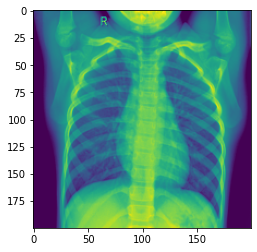

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = train_image_n[0]
imgplot = plt.imshow(img)
plt.show()

The Cropped Normal Images


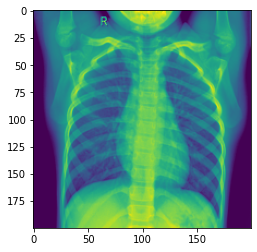

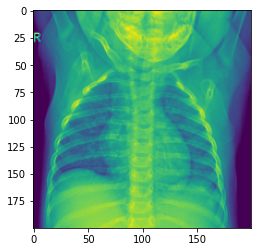

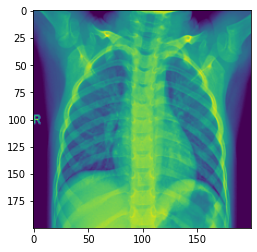

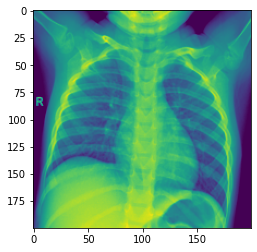

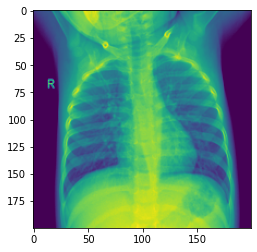

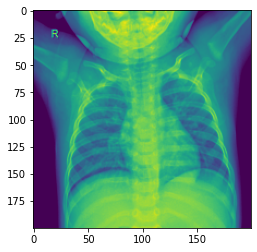

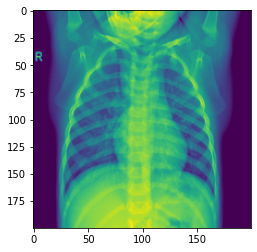

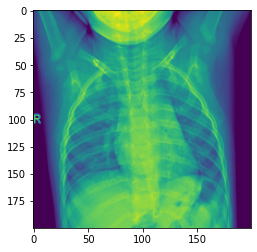

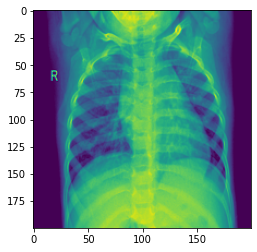

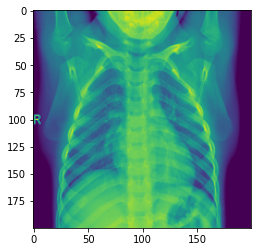

Cropped Virus Images


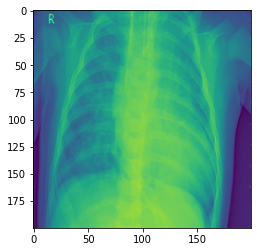

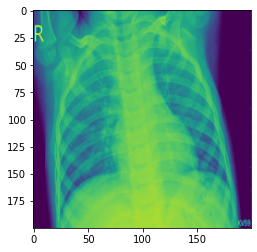

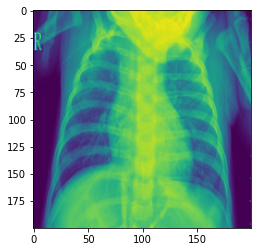

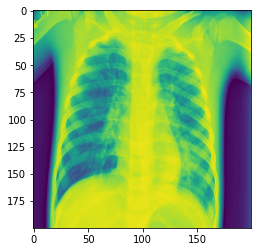

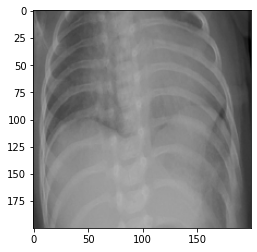

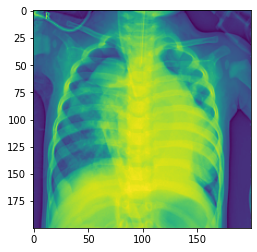

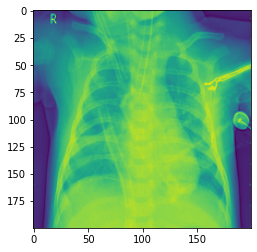

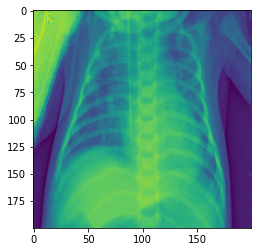

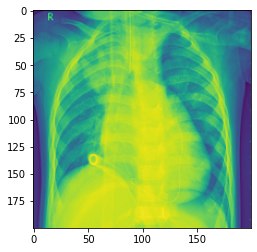

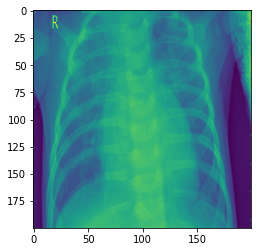

In [0]:
print("The Cropped Normal Images")
for i in range(0,10):
  im = train_image_n[i]
  plt.imshow(im)
  plt.show()

print("Cropped Virus Images")
for i in range(0,10):
  im = train_image_p[i]
  plt.imshow(im)
  plt.show()

In [0]:
files = os.listdir('/content/gdrive/Shared drives/Data/chest_xray/train/NORMAL')
files

['IM-0545-0001-0001.jpeg',
 'IM-0530-0001.jpeg',
 'IM-0549-0001-0001.jpeg',
 'IM-0539-0001.jpeg',
 'IM-0536-0001.jpeg',
 'IM-0540-0001.jpeg',
 'IM-0541-0001.jpeg',
 'IM-0532-0001.jpeg',
 'IM-0545-0001.jpeg',
 'IM-0533-0001-0001.jpeg',
 'IM-0547-0001.jpeg',
 'IM-0544-0001.jpeg',
 'IM-0549-0001-0002.jpeg',
 'IM-0538-0001.jpeg',
 'IM-0531-0001.jpeg',
 'IM-0543-0001-0002.jpeg',
 'IM-0549-0001.jpeg',
 'IM-0528-0001.jpeg',
 'IM-0529-0001.jpeg',
 'IM-0545-0001-0002.jpeg',
 'IM-0531-0001-0001.jpeg',
 'IM-0533-0001-0002.jpeg',
 'IM-0546-0001.jpeg',
 'IM-0539-0001-0001.jpeg',
 'IM-0539-0001-0002.jpeg',
 'IM-0548-0001.jpeg',
 'IM-0542-0001.jpeg',
 'IM-0564-0001.jpeg',
 'IM-0551-0001.jpeg',
 'IM-0555-0001-0001.jpeg',
 'IM-0571-0001.jpeg',
 'IM-0563-0001.jpeg',
 'IM-0560-0001.jpeg',
 'IM-0551-0001-0002.jpeg',
 'IM-0569-0001.jpeg',
 'IM-0562-0001.jpeg',
 'IM-0553-0001-0002.jpeg',
 'IM-0556-0001.jpeg',
 'IM-0561-0001.jpeg',
 'IM-0557-0001.jpeg',
 'IM-0555-0001-0002.jpeg',
 'IM-0580-0001.jpeg',
 'IM-0

In [0]:
def saveImages(imageArray, directory):
  index=0
  for image in imageArray:
    image.save(directory + '/image'+ str(index)+ '.jpg')
    index = index + 1

In [0]:
#Save images after preprocessing

saveImages(train_image_n, '/content/gdrive/Shared drives/Data/chest_xray_subset/Train/N')
saveImages(train_image_p, '/content/gdrive/Shared drives/Data/chest_xray_subset/Train/P')
saveImages(test_image_n, '/content/gdrive/Shared drives/Data/chest_xray_subset/Test/N')
saveImages(test_image_p, '/content/gdrive/Shared drives/Data/chest_xray_subset/Test/P')
saveImages(val_image_n, '/content/gdrive/Shared drives/Data/chest_xray_subset/Val/N')
saveImages(val_image_p, '/content/gdrive/Shared drives/Data/chest_xray_subset/Val/P')

NameError: ignored

In [0]:
#Load images from drive

image_train_dir = '/content/gdrive/Shared drives/Data/chest_xray/Train'
image_test_dir = '/content/gdrive/Shared drives/Data/chest_xray/Test'
image_val_dir = '/content/gdrive/Shared drives/Data/chest_xray/val'


In [0]:
#Standardize size
resize = transforms.Compose([transforms.Resize((200,200)), transforms.ToTensor()])

#Format dataset to load into model
training_dataset = datasets.ImageFolder(image_train_dir, transform=resize)
validation_dataset = datasets.ImageFolder(image_val_dir, transform=resize)
testing_dataset = datasets.ImageFolder(image_test_dir, transform=resize)

train_loader = torch.utils.data.DataLoader(training_dataset, batch_size=64, shuffle=True)
validate_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=32)
test_loader = torch.utils.data.DataLoader(testing_dataset, batch_size=32)


In [0]:
model = models.resnet18(pretrained=True)
model

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [0]:
model = models.alexnet(pretrained=True)
model

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [0]:
from collections import OrderedDict
for parameter in model.parameters():
    parameter.requires_grad = False

classifier = nn.Sequential(OrderedDict([('fc1', nn.Linear(25088, 5000)),
                                        ('relu', nn.ReLU()),
                                        ('drop', nn.Dropout(p=0.5)),
                                        ('fc2', nn.Linear(5000, 2)),
                                        ('output', nn.LogSigmoid())]))


model.classifier = classifier

In [0]:
def validation(model, validateloader, criterion):
    
    val_loss = 0
    accuracy = 0
    
    for images, labels in iter(validateloader):

        images, labels = images.to('cuda'), labels.to('cuda')

        output = model.forward(images)
        val_loss += criterion(output, labels).item()

        probabilities = torch.exp(output)
        
        equality = (labels.data == probabilities.max(dim=1)[1])
        accuracy += equality.type(torch.FloatTensor).mean()
    
    return val_loss, accuracy

In [0]:
criterion = nn.NLLLoss()

optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

In [0]:

def train_classifier():

        epochs = 15
        steps = 0
        print_every = 40

        model.to('cuda')

        for e in range(epochs):
        
            model.train()
    
            running_loss = 0
    
            for images, labels in iter(train_loader):
        
                steps += 1
        
                images, labels = images.to('cuda'), labels.to('cuda')
        
                optimizer.zero_grad()
        
                output = model.forward(images)
                loss = criterion(output, labels)
                loss.backward()
                optimizer.step()
        
                running_loss += loss.item()
        
                if steps % print_every == 0:
                
                    model.eval()
                
                    # Turn off gradients for validation, saves memory and computations
                    with torch.no_grad():
                        validation_loss, accuracy = validation(model, validate_loader, criterion)
            
                    print("Epoch: {}/{}.. ".format(e+1, epochs),
                          "Training Loss: {:.3f}.. ".format(running_loss/print_every),
                          "Validation Loss: {:.3f}.. ".format(validation_loss/len(validate_loader)),
                          "Validation Accuracy: {:.3f}".format(accuracy/len(validate_loader)))
            
                    running_loss = 0
                    model.train()
                    
train_classifier() 

RuntimeError: ignored

In [0]:
def test_accuracy(model, test_loader):

    # Do validation on the test set
    model.eval()
    model.to('cuda')

    with torch.no_grad():
    
        accuracy = 0
    
        for images, labels in iter(test_loader):
    
            images, labels = images.to('cuda'), labels.to('cuda')
    
            output = model.forward(images)

            probabilities = torch.exp(output)
        
            equality = (labels.data == probabilities.max(dim=1)[1])
        
            accuracy += equality.type(torch.FloatTensor).mean()
        
        print("Test Accuracy: {}".format(accuracy/len(test_loader)))    
        
        
test_accuracy(model, test_loader)

NameError: ignored

In [0]:
def save_checkpoint(model,arch,file_name):

    model.class_to_idx = training_dataset.class_to_idx

    checkpoint = {'arch': arch,
                  'class_to_idx': model.class_to_idx,
                  'model_state_dict': model.state_dict()
                 }

    torch.save(checkpoint, '/content/gdrive/Shared drives/Data/colab_code/'+filename)
    
save_checkpoint(resnet18,'resnet18-crossentropy','rensenet')

In [0]:
from collections import OrderedDict

# Function that loads a checkpoint and rebuilds the model

def load_checkpoint(filepath):
    
    checkpoint = torch.load(filepath)
    
    if checkpoint['arch'] == 'vgg16':
        
        model = models.vgg16(pretrained=True)
        
        for param in model.parameters():
            param.requires_grad = False
    else:
        print("Architecture not recognized.")
    model.class_to_idx = checkpoint['class_to_idx']
    
    classifier = nn.Sequential(OrderedDict([('fc1', nn.Linear(25088, 5000)),
                                            ('relu', nn.ReLU()),
                                            ('drop', nn.Dropout(p=0.5)),
                                            ('fc2', nn.Linear(5000, 2)),
                                            ('output', nn.LogSoftmax(dim=1))]))

    model.classifier = classifier
    
    model.load_state_dict(checkpoint['model_state_dict'])
    
    return model

model = load_checkpoint('/content/drive/Shared drives/Data/colab_code/vgg.pth')

In [0]:
test_accuracy(model, test_loader)

KeyboardInterrupt: ignored